In [ ]:
# - PART A

In [1]:
# - import libraries
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# - open GPP file
gpp_file = '../data/gpp_sif/orch_gpp_monthly_2007-2011.nc' #'C:\\Users\\nmacbean\Downloads\\data\\orch_gpp_monthly_2007-2011.nc'
f=nc.Dataset(gpp_file,'r')

In [3]:
# type your commands here

In [4]:
# - read in GPP data and close file
gpp_var = 'GPP'
gpp_data = f.variables[gpp_var][:]
f.close()

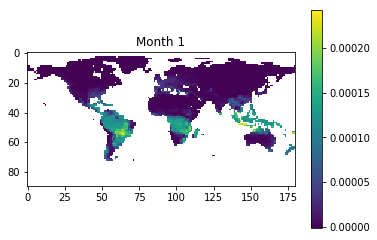

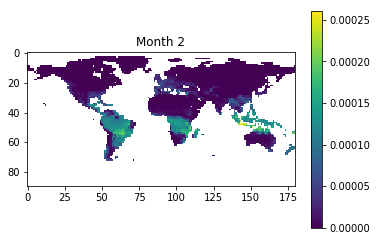

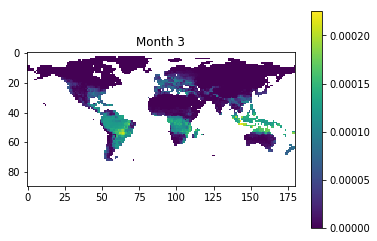

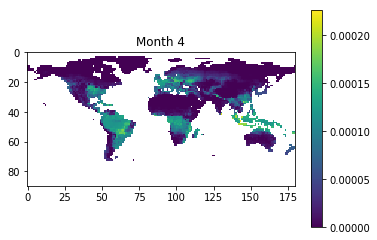

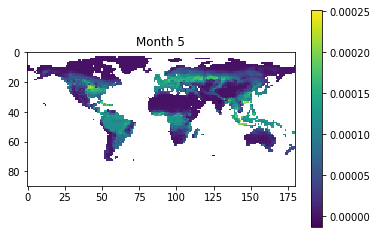

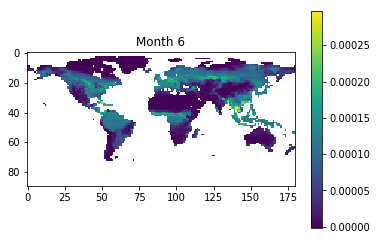

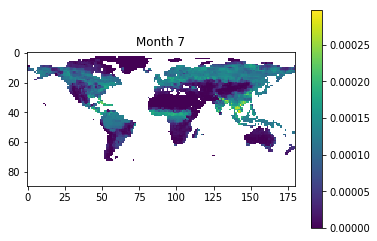

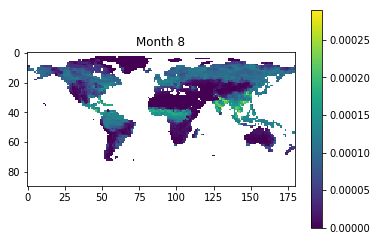

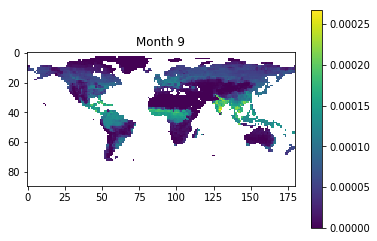

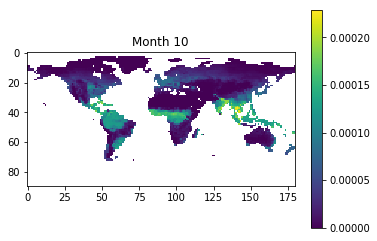

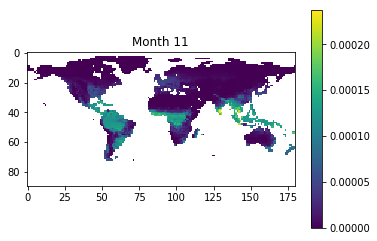

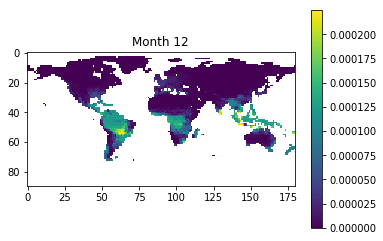

In [8]:
# - loop over the first 12 months of the data and plot
for i in range(np.shape(gpp_data[:12,:,:])[0]):
    plt.imshow(gpp_data[i,:,:])
    # - title and colorbar not required for assignment
    plt.title('Month '+str(i+1))
    plt.colorbar()
    plt.show()

Questions:
1. How does the GPP of the tropical regions change over the course of the year?  
ANSWER: The tropical GPP does not change much, although it is slightly higher in January and December.  


2. How does the GPP in the northern hemisphere change over the course of the year?  
ANSWER: GPP in the northern hemisphere changes much more than the tropics over the course of the year. The values are close to zero in the winter months and much higher in the summer.  


3. Bonus question: why do you think there is a difference in how much change occurs in the tropics and in the northern hemisphere? [Hint: think what GPP is representing - the uptake of CO2 by plants]  
ANSWER: GPP is the amount of plant photosynthesis. The tropics are evergreen forests - they retain their leaves all year round. Therefore, the amount of photosynthesis does not change much throughout the year. In the northern hemisphere however, many (though not all) plants drop their leaves in the cooler winter months; therefore, no photosynthesis is occurring and the GPP drops to zero.  

In [9]:
# - PART B

In [10]:
# - calculate total GPP over the time axis
total_gpp = np.sum(gpp_data, axis=0)

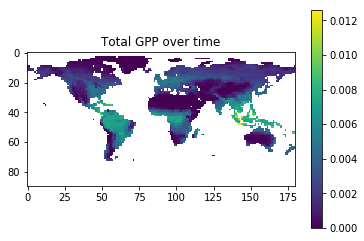

In [12]:
# - plot the total GPP
plt.imshow(total_gpp)
plt.title('Total GPP over time')
plt.colorbar()
plt.show()

Note! In the total GPP plot we see much more GPP in the northern hemisphere as we have now summed over both the winter and summer months. The total GPP in the tropics is still higher.

In [13]:
# - 
# - save the total GPP to a netCDF file
# -

# - first open a new netcdf file to write to
new_f = nc.Dataset('total_gpp.nc', 'w')

# - add the lat and lon dimensions to the file
dim_names = ['lat', 'lon']
dim_values = [90, 180]
for nd, dd in enumerate(dim_names):
    new_f.createDimension(dd, dim_values[nd])

# - create a new variable for the total GPP data with floating point data type and lat and lon dimensions
new_var = new_f.createVariable('totalGPP', float, ('lat', 'lon'), fill_value=9.969209968386869e+36)

# - save the total GPP to that new variable
new_var[:] = total_gpp.tolist()

# - close the file
new_f.close()